# **`MIAD_G1_Perfil_riesgo_establecimientos_de_credito:`**

In [ ]:
# librerías:

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
# Cargamos base de datos:

base = pd.read_excel('/content/sample_data/Base de datos no supervisado.xlsx', sheet_name='Datos')
base

,Fecha,Banco,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_Op/Activos,ROA,ROE,Calidad,Utilidad/ingresos
0,2023-01-31,BANCAMÍA S. A.,21.44,220.6,236.855848,84.041176,11.377511,2.086267,9.858787,5.678361,6.628147
1,2023-01-31,BANCIEN S.A,13.30,129.6,96.637797,76.662002,3.808821,1.440552,15.690700,4.317852,7.062480
2,2023-01-31,BANCO AGRARIO,17.84,201.9,94.750812,52.756888,2.603216,2.025510,30.879144,6.123243,15.484628
3,2023-01-31,BANCO AV VILLAS S. A.,11.00,119.4,101.849603,74.974972,3.141791,0.475283,5.498660,3.362247,3.826169
4,2023-01-31,BANCO BTG PACTUAL COLOMBIA S. A.,107.62,1074.4,233.641421,52.792218,6.037876,1.103042,1.703419,0.000000,5.707709
...,...,...,...,...,...,...,...,...,...,...,...
135,2023-05-31,BBVA COLOMBIA S. A.,11.18,163.5,99.856590,70.981389,1.653817,0.531014,8.596398,3.902246,0.630574
136,2023-05-31,BCSC S. A.,17.64,245.2,90.658649,75.046637,4.697832,0.943552,8.635984,6.108591,6.427873
137,2023-05-31,CITIBANK,26.44,350.8,54.185164,32.956876,1.817916,4.479309,33.869099,0.000000,5.250326
138,2023-05-31,MI BANCO,16.92,262.1,113.630602,83.354161,12.368655,-0.956189,-6.773247,4.646609,-3.510111


In [ ]:
base.describe()

,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_Op/Activos,ROA,ROE,Calidad,Utilidad/ingresos
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,19.776357,228.378571,110.055401,68.219279,4.318587,1.042861,6.677767,4.250047,2.725963
std,17.401067,144.565651,40.296958,19.458974,3.269848,1.948868,17.165535,2.287920,9.299165
min,10.450000,107.100000,0.000000,0.000000,0.901596,-6.436375,-75.649607,0.000000,-42.459216
25%,13.147500,152.275000,94.472227,65.649382,2.178869,0.200297,2.019197,3.416988,0.613867
50%,16.405000,192.900000,104.931934,73.637514,3.096734,0.852133,7.010464,4.272459,3.869759
75%,18.240000,247.800000,123.514899,77.466444,4.738712,1.935540,12.773172,5.708554,6.393029
max,110.310000,1091.700000,250.531764,97.017033,12.368655,6.117238,34.289354,11.861044,17.713658


<ipython-input-4-d17eff09bd1c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = base.corr()


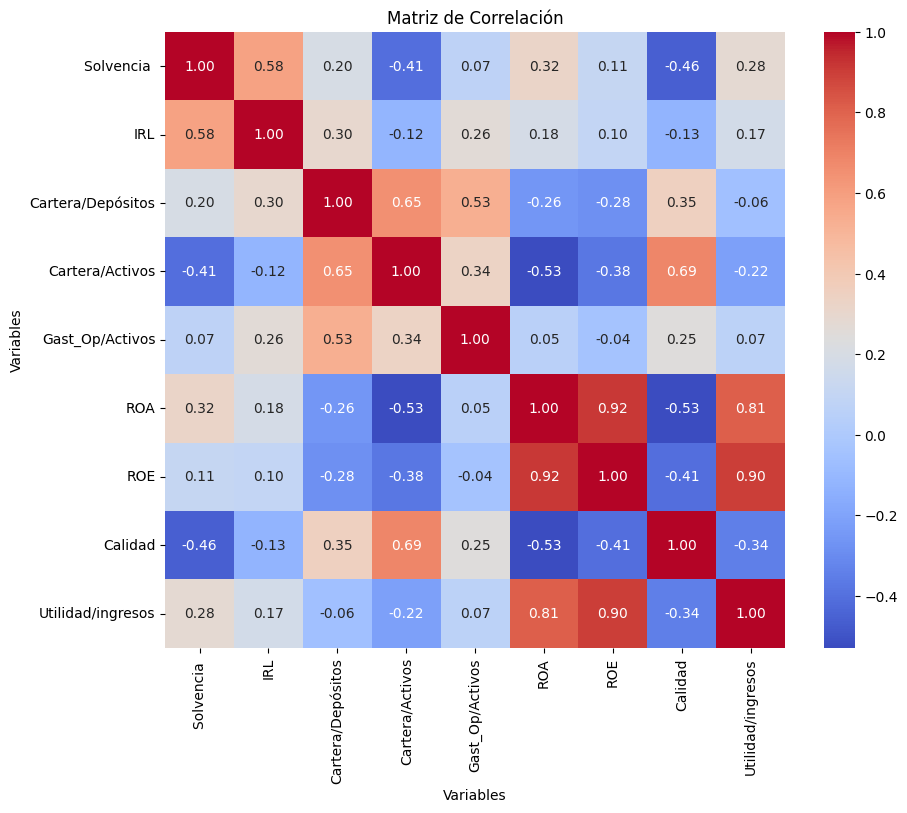

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion = base.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

# Configurar etiquetas de los ejes y el título
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

**Análisis de componentes principales**

In [ ]:
# Se defienen las x como la base sin las dos primeras columnas:

x = base.iloc[:, 2:]
x

,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_Op/Activos,ROA,ROE,Calidad,Utilidad/ingresos
0,21.44,220.6,236.855848,84.041176,11.377511,2.086267,9.858787,5.678361,6.628147
1,13.30,129.6,96.637797,76.662002,3.808821,1.440552,15.690700,4.317852,7.062480
2,17.84,201.9,94.750812,52.756888,2.603216,2.025510,30.879144,6.123243,15.484628
3,11.00,119.4,101.849603,74.974972,3.141791,0.475283,5.498660,3.362247,3.826169
4,107.62,1074.4,233.641421,52.792218,6.037876,1.103042,1.703419,0.000000,5.707709
...,...,...,...,...,...,...,...,...,...
135,11.18,163.5,99.856590,70.981389,1.653817,0.531014,8.596398,3.902246,0.630574
136,17.64,245.2,90.658649,75.046637,4.697832,0.943552,8.635984,6.108591,6.427873
137,26.44,350.8,54.185164,32.956876,1.817916,4.479309,33.869099,0.000000,5.250326
138,16.92,262.1,113.630602,83.354161,12.368655,-0.956189,-6.773247,4.646609,-3.510111


In [ ]:
# Estandarizamos las variables para que no influyan las distintas medidas:

scaler = StandardScaler()
x_estandarizado = scaler.fit_transform(x)
x_estandarizado

array([[ 0.09594909, -0.0539997 ,  3.1579492 , ...,  0.18597975,
         0.62652655,  0.42113402],
       [-0.373518  , -0.68573173, -0.33416373, ...,  0.52694515,
         0.02974291,  0.46800841],
       [-0.11167763, -0.18381716, -0.38115885, ...,  1.41494436,
         0.82167325,  1.37694919],
       ...,
       [ 0.38431953,  0.84986305, -1.39144121, ...,  1.5897534 ,
        -1.86427251,  0.2724359 ],
       [-0.1647378 ,  0.23409787,  0.08903994, ..., -0.78641955,
         0.17395102, -0.67301375],
       [-0.49982425, -0.1234208 , -0.07420289, ..., -0.59284697,
         0.26750257, -0.37110349]])

In [ ]:
# Se tienen entonces 145 observaciones para 9 variables estandarizadas:

print(len(x_estandarizado[0]))
print(len(x_estandarizado))

9
140


In [ ]:
# Se aplica PCA:

pca = PCA()
pca.fit(x_estandarizado)

PCA()

In [ ]:
# Acceder al primer componente principal:

loadings = pca.components_[0, :]
loadings


array([-0.24262896, -0.12466993,  0.22718279,  0.38628329,  0.09639422,
       -0.46826606, -0.43602243,  0.38620552, -0.3961396 ])

In [ ]:
# Obtener la varianza explicada por el primer componente principal:

varianza_explicada_primer_componente = pca.explained_variance_ratio_[0]
varianza_explicada_primer_componente

0.41543162139459466

In [ ]:
matriz = x_estandarizado
matriz = pd.DataFrame(matriz)
matriz.to_excel('/content/sample_data/matriz.xlsx', index=False)


In [ ]:
loadings = pd.DataFrame(loadings)
loadings.to_excel('/content/sample_data/loadings.xlsx', index=False)

In [ ]:
# Se define entonces Indicador como el primero componente principal que explica el 54,16 % de la varianza:

indicador = pca.transform(x_estandarizado)[:, 0]
indicador = pd.DataFrame(indicador)
indicador.rename(columns={0: 'Indicador'}, inplace=True)

In [ ]:
# Se integran los campos de Fecha y Banco de la base:

indicador['Fecha'] = base['Fecha']
indicador['Banco'] = base['Banco']
indicador

,Indicador,Fecha,Banco
0,0.967380,2023-01-31,BANCAMÍA S. A.
1,-0.246250,2023-01-31,BANCIEN S.A
2,-1.477410,2023-01-31,BANCO AGRARIO
3,0.239961,2023-01-31,BANCO AV VILLAS S. A.
4,-2.253848,2023-01-31,BANCO BTG PACTUAL COLOMBIA S. A.
...,...,...,...
135,0.200107,2023-05-31,BBVA COLOMBIA S. A.
136,0.183443,2023-05-31,BCSC S. A.
137,-3.641551,2023-05-31,CITIBANK
138,1.729436,2023-05-31,MI BANCO


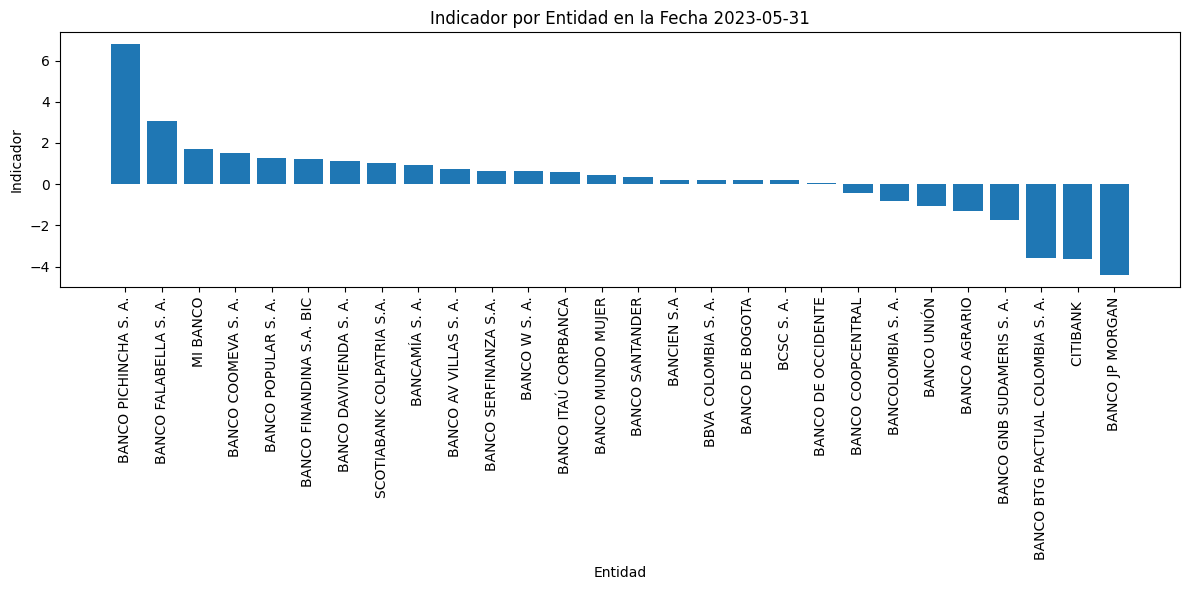

In [ ]:
# Primera grafica de Indicador por Entidas Bancaria:

fecha_dada = '2023-05-31'  # fecha

# base de datos filtrada
filtro= indicador[indicador['Fecha'] == fecha_dada]
filtro = filtro.sort_values(by='Indicador', ascending=False)

# Gráfica
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.bar(filtro['Banco'], filtro['Indicador'])
plt.xlabel('Entidad')
plt.ylabel('Indicador')
plt.title(f'Indicador por Entidad en la Fecha {fecha_dada}')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Entre más alto sea el indicador más riesgosa es la entidad, **Banco Pichincha** siempre es uno de los establecimientos de crédito que arroja alertas. **Banco Falabella**, es un banco muy concentrado en crédito de consumo, específicamente, tarjetas de crédito y en la coyuntura actual dado el aumento de morosidad esta entidad se ha visto afectada. Mi banco anteriormente era la compañia de financiamiento Giros y Finanzas (las compañias suelen ser más riesgosas que los bancos).

**Análisis de Clusters**

**k-means**

El método de codo, o Elbow (en inglés), consiste en graficar la varianza intra cluster en función del número de clusters y encontrar el punto de la curva, codo, a partir del cual la mejora deja de ser notable.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

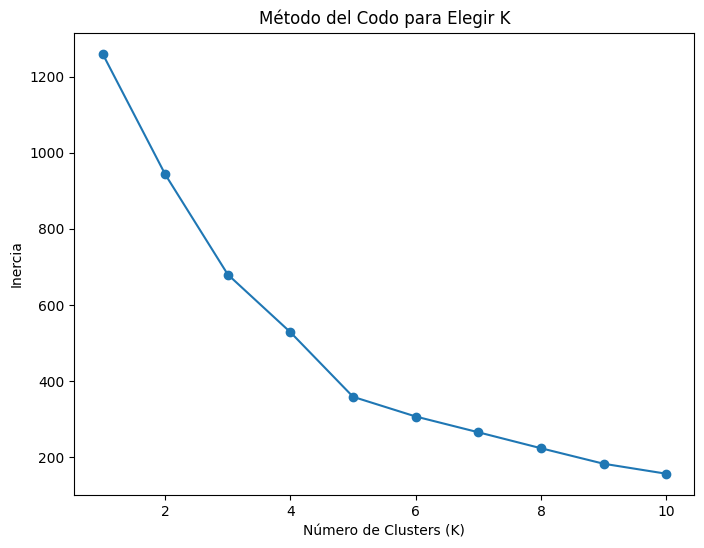

In [ ]:
# Se utiliza el metodo del codo (Elbow) para determinar el mejor parametro de k para empezar:

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x_estandarizado)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Elegir K')
plt.show()

Teniendo en cuenta la grafica entonces se toma un valor de **k=3**.

In [ ]:
# Escojo 3 clusteres para hacer Kmeans:

kmeans_DM = KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(x_estandarizado)


El método **fit_predict**, computa los clusters y predice el cluster al que pertenece cada observación.

In [ ]:
## Entonces, las 4 primeras observaciones pertenecen al cluster 2

kmeans_DM

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0], dtype=int32)

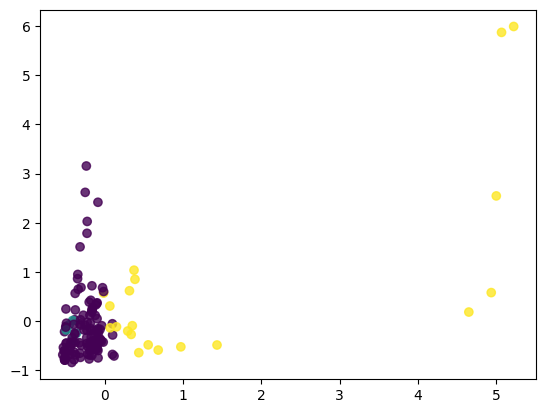

In [ ]:
fig, ax = plt.subplots()
g_puntos = plt.scatter(x_estandarizado[:,0], x_estandarizado[:,1], c = kmeans_DM, alpha = 0.8, label = "Centroides")
plt.show()

In [ ]:
# Utilice este espacio para escribir el código.
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(x_estandarizado)

# Obtener las etiquetas de cluster asignadas a cada imagen
cluster_labels = kmeans.labels_

# Crear un DataFrame con las etiquetas de cluster
cluster_df = pd.DataFrame({ 'Cluster': cluster_labels})

cluster_df

,Cluster
0,0
1,0
2,0
3,0
4,2
...,...
135,0
136,0
137,2
138,0


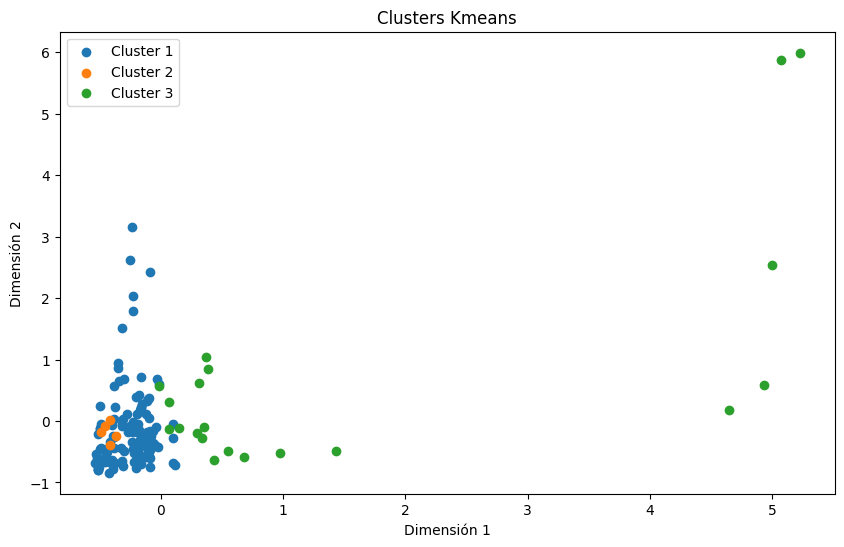

In [ ]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = x_estandarizado[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

plt.title('Clusters Kmeans')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()

Algunos datos superpuestos pero se ven segmentados en 3 grupos claramente.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# se calcula el silhouette score:

score_1 = silhouette_score(x_estandarizado, cluster_labels)
print(f"Silhouette Score: {score_1}")

Silhouette Score: 0.5176586977603799


Un silhouette score cercano a cero nos indica un mal segmentado teniendo en cuenta los clusters definidos como parámetro inicial en Kmeans, la segmentación se realiza con cierta ambigüedad por esto los puntos superpuestos.

**k-means con PCA**

In [ ]:
# Se parte de los mismo predictores:

x.head()

,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_Op/Activos,ROA,ROE,Calidad,Utilidad/ingresos
0,21.44,220.6,236.855848,84.041176,11.377511,2.086267,9.858787,5.678361,6.628147
1,13.30,129.6,96.637797,76.662002,3.808821,1.440552,15.690700,4.317852,7.062480
2,17.84,201.9,94.750812,52.756888,2.603216,2.025510,30.879144,6.123243,15.484628
3,11.00,119.4,101.849603,74.974972,3.141791,0.475283,5.498660,3.362247,3.826169
4,107.62,1074.4,233.641421,52.792218,6.037876,1.103042,1.703419,0.000000,5.707709


In [ ]:
# Estandarizamos las variables para que no influyan las distintas medidas:

scaler = StandardScaler()
x_estandarizado = scaler.fit_transform(x)
x_estandarizado

array([[ 0.09594909, -0.0539997 ,  3.1579492 , ...,  0.18597975,
         0.62652655,  0.42113402],
       [-0.373518  , -0.68573173, -0.33416373, ...,  0.52694515,
         0.02974291,  0.46800841],
       [-0.11167763, -0.18381716, -0.38115885, ...,  1.41494436,
         0.82167325,  1.37694919],
       ...,
       [ 0.38431953,  0.84986305, -1.39144121, ...,  1.5897534 ,
        -1.86427251,  0.2724359 ],
       [-0.1647378 ,  0.23409787,  0.08903994, ..., -0.78641955,
         0.17395102, -0.67301375],
       [-0.49982425, -0.1234208 , -0.07420289, ..., -0.59284697,
         0.26750257, -0.37110349]])

In [ ]:
# Configurar y aplicar PCA:
n_components = 0.80  # Retener el 80% de la varianza.
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)
x_pca = pca.fit(x_estandarizado)


In [ ]:
# Imprimir la cantidad de componentes y la varianza explicada
print("Número de componentes seleccionados:", pca.n_components_)
print("Varianza explicada por los componentes seleccionados:", sum(pca.explained_variance_ratio_))

Número de componentes seleccionados: 3
Varianza explicada por los componentes seleccionados: 0.8152349530782037


In [ ]:
# Reduzco la dimensión de la matriz de predictores utilizando 3 componentes

n_components = 3
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)

# Ajustar PCA a los datos originales y transformarlos
x_reduced = pca.fit_transform(x_estandarizado)

In [ ]:
#Volviendo aplicar K-medias

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(x_reduced)

# Obtener las etiquetas de cluster asignadas a cada imagen
cluster_labels = kmeans.labels_

# Crear un DataFrame con las etiquetas de cluster
cluster_df_reduced = pd.DataFrame({ 'Cluster': cluster_labels})

cluster_df_reduced.tail(28)

,Cluster
112,1
113,1
114,1
115,1
116,0
117,1
118,1
119,1
120,1
121,1


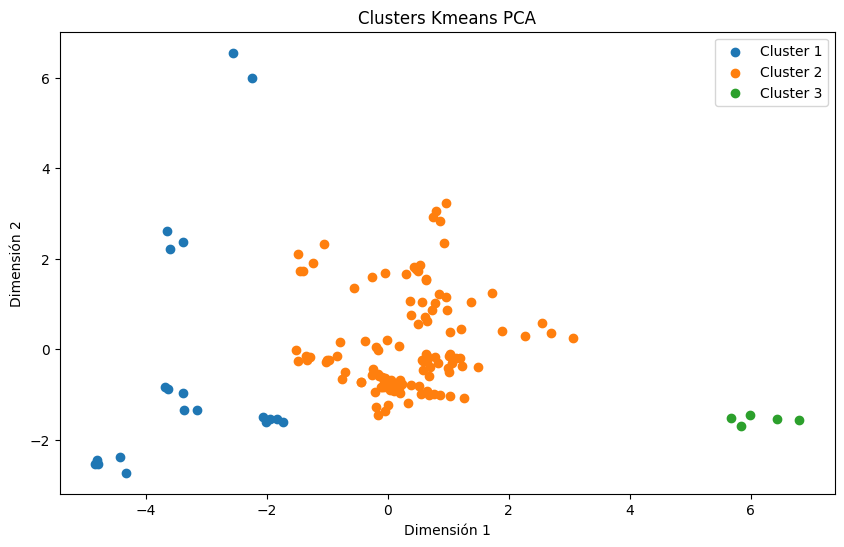

In [ ]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = x_reduced[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

plt.title('Clusters Kmeans PCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()

Al reducir la dimensionalidad de los x se observa un mucho mejor segmentado de los datos que en el primer intento con **Kmeans**.

In [ ]:
# se calcula el silhouette score:

score_2 = silhouette_score(x_reduced, cluster_labels)
print(f"Silhouette Score: {score_2}")

Silhouette Score: 0.597139116222133


Se observa una mejor segmentación en los datos por medio de la anterior gráfica, al reducir la dimensionalidad de las predictores y según el **Coeficiente de Silhouette** que cuantifica cuán buena es la asignación que se ha hecho de una observación, en este caso se obtuvo un mejor valor de **0.59713**.

Ahora probemos con la varianza obtenida en el primer análisis de componentes principales realizado **(var= 0.4154)**:

In [ ]:
# Configurar y aplicar PCA:

n_components = 0.4154
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)
x_pca = pca.fit(x_estandarizado)

In [ ]:
# Imprimir la cantidad de componentes y la varianza explicada:

print("Número de componentes seleccionados:", pca.n_components_)
print("Varianza explicada por los componentes seleccionados:", sum(pca.explained_variance_ratio_))

Número de componentes seleccionados: 1
Varianza explicada por los componentes seleccionados: 0.41543162139459466


In [ ]:
# Reduzco la dimensión de la matriz de predictores utilizando 2 componentes para poder graficar:

n_components = 2
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)

# Ajustar PCA a los datos originales y transformarlos
x_reduced_1 = pca.fit_transform(x_estandarizado)

In [ ]:
#Volviendo aplicar K-medias:

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(x_reduced_1)

# Obtener las etiquetas de cluster asignadas a cada imagen
cluster_labels = kmeans.labels_

# Crear un DataFrame con las etiquetas de cluster
cluster_df_reduced_1 = pd.DataFrame({ 'Cluster': cluster_labels})

cluster_df_reduced_1

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
135,0
136,0
137,1
138,0


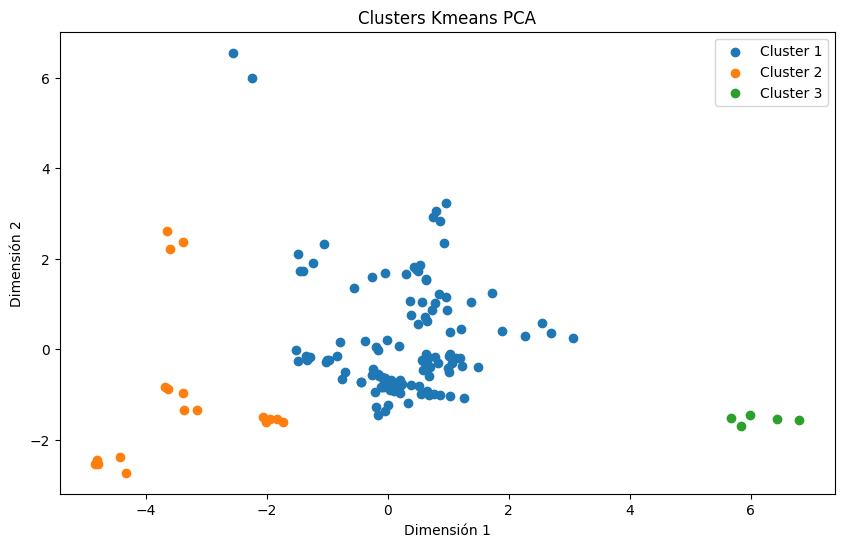

In [ ]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = x_reduced_1[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

plt.title('Clusters Kmeans PCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()

No se observan grandes cambios con respecto a la prueba anterior, 2 componentes puedes entonces ser suficientes para explicar el 75,52 % de la varianza .

In [ ]:
# se calcula el silhouette score:

score_3 = silhouette_score(x_reduced, cluster_labels)
print(f"Silhouette Score: {score_3}")

Silhouette Score: 0.5648629921923068


El cambio en el coeficiente es mínimo **score = 0.56486**, pero en general con 3 componentes tiene un mejor desempeño aunque sea un cambio muy pequeño.

**K-medoides**

K-medoides es un método de clustering muy similar a K-medias puesto que ambos agrupan las observaciones en K clusters. Sin embargo, la diferencia principal radica en que K-medoides en vez de utilizar centroides, emplea medoides. Un medoide es un elemento del cluster cuya distancia promedio entre él y todos los demás elementos del cluster es la menor posible.

In [ ]:
#!pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import accuracy_score

In [ ]:
# Se parte de los mismo predictores:

x.head()

,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_Op/Activos,ROA,ROE,Calidad,Utilidad/ingresos
0,21.44,220.6,236.855848,84.041176,11.377511,2.086267,9.858787,5.678361,6.628147
1,13.30,129.6,96.637797,76.662002,3.808821,1.440552,15.690700,4.317852,7.062480
2,17.84,201.9,94.750812,52.756888,2.603216,2.025510,30.879144,6.123243,15.484628
3,11.00,119.4,101.849603,74.974972,3.141791,0.475283,5.498660,3.362247,3.826169
4,107.62,1074.4,233.641421,52.792218,6.037876,1.103042,1.703419,0.000000,5.707709


In [ ]:
# Estandarizamos las variables para que no influyan las distintas medidas:

scaler = StandardScaler()
x_estandarizado_med = scaler.fit_transform(x)
x_estandarizado_med

array([[ 0.09594909, -0.0539997 ,  3.1579492 , ...,  0.18597975,
         0.62652655,  0.42113402],
       [-0.373518  , -0.68573173, -0.33416373, ...,  0.52694515,
         0.02974291,  0.46800841],
       [-0.11167763, -0.18381716, -0.38115885, ...,  1.41494436,
         0.82167325,  1.37694919],
       ...,
       [ 0.38431953,  0.84986305, -1.39144121, ...,  1.5897534 ,
        -1.86427251,  0.2724359 ],
       [-0.1647378 ,  0.23409787,  0.08903994, ..., -0.78641955,
         0.17395102, -0.67301375],
       [-0.49982425, -0.1234208 , -0.07420289, ..., -0.59284697,
         0.26750257, -0.37110349]])


Para crear el modelo de K-medoides, partimos del mismo **k=3** que se obtuvo en el punto anterior.


In [ ]:

# Crear el modelo de k-medoides
num_clusters = 3  # Numero de Clusters
kmedoids = KMedoids(n_clusters=num_clusters, random_state=0)

# Ajustar el modelo a los datos originales
kmedoids.fit(x_estandarizado_med)

# Obtener las etiquetas asignadas por k-medoides
cluster_labels_med = kmedoids.labels_

In [ ]:
# Crear un DataFrame con las etiquetas de cluster:

cluster_df_med = pd.DataFrame({ 'Cluster': cluster_labels_med})

cluster_df_med

,Cluster
0,2
1,1
2,0
3,1
4,0
...,...
135,1
136,2
137,0
138,2


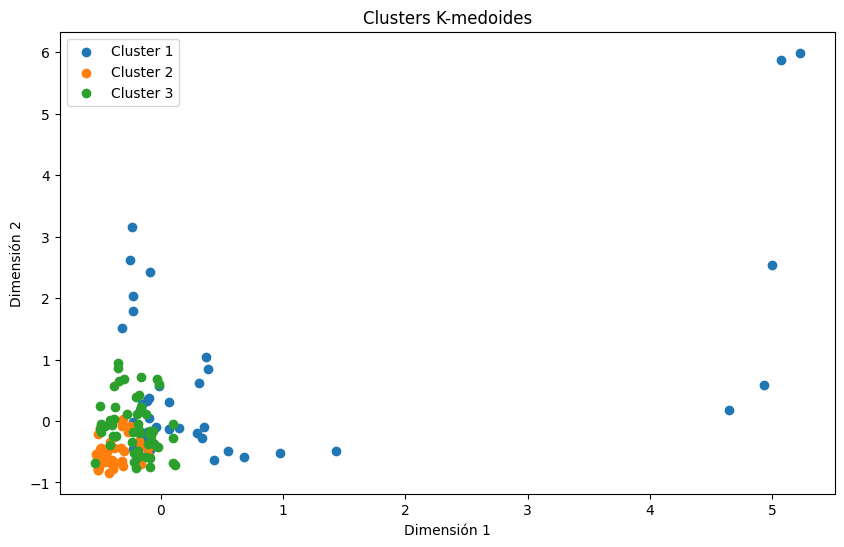

In [ ]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = x_estandarizado_med[cluster_labels_med == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

plt.title('Clusters K-medoides')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()

Sin aplicar PCA comparando este resultado de **K-medoides** con **Kmeans** se observa que los datos se encuentran un poco superpuestos, esto se puede deber a la naturaleza de los mismos datos.

In [ ]:
# se calcula el silhouette score:

score_4 = silhouette_score(x_estandarizado_med, cluster_labels_med)
print(f"Silhouette Score: {score_4}")

Silhouette Score: 0.12303735045874648


El valor de coeficiente = **0.1230** refleja la superpuesta segmentación de la gráfica, sin lugar a duda se tiene un mejor resultado en Kmeans antes de realizar PCA.

**K-medoides con PCA**

In [ ]:
# Configurar y aplicar PCA:
n_components = 0.80  # Retener el 80% de la varianza.
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)
x_pca = pca.fit(x_estandarizado_med)

In [ ]:
# Imprimir la cantidad de componentes y la varianza explicada
print("Número de componentes seleccionados:", pca.n_components_)
print("Varianza explicada por los componentes seleccionados:", sum(pca.explained_variance_ratio_))


Número de componentes seleccionados: 3
Varianza explicada por los componentes seleccionados: 0.8152349530782037


In [ ]:
# Reduzco la dimensión de la matriz de predictores utilizando 3 componentes

n_components = 3
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)

# Ajustar PCA a los datos originales y transformarlos
x_reduced_med = pca.fit_transform(x_estandarizado_med)

In [ ]:
# Crear el modelo de k-medoides
num_clusters = 3  # Numero de Clusters
kmedoids = KMedoids(n_clusters=num_clusters, random_state=0)

# Ajustar el modelo a los datos originales
kmedoids.fit(x_reduced_med)

# Obtener las etiquetas asignadas por k-medoides
cluster_labels_med_reduced = kmedoids.labels_


In [ ]:
# Crear un DataFrame con las etiquetas de cluster:

cluster_df_med_reduced = pd.DataFrame({ 'Cluster': cluster_labels_med_reduced})

cluster_df_med_reduced

,Cluster
0,1
1,2
2,2
3,0
4,1
...,...
135,0
136,0
137,2
138,1


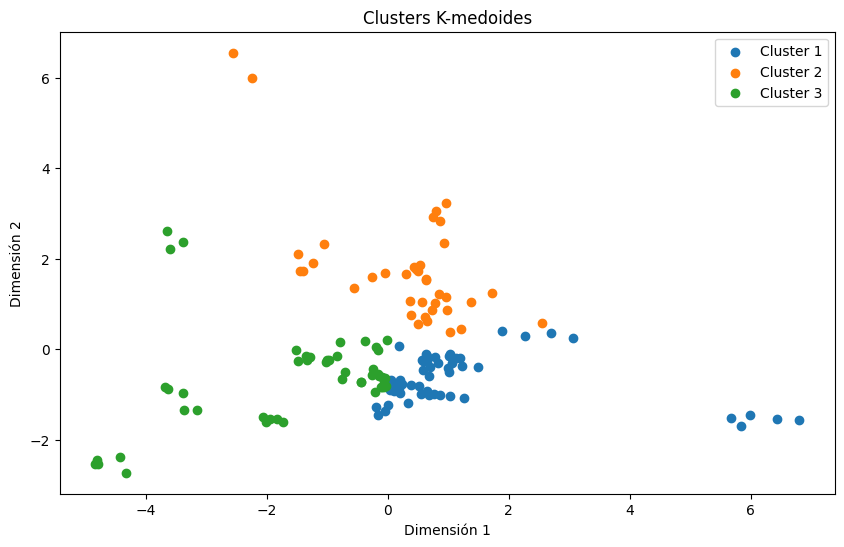

In [ ]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = x_reduced_med[cluster_labels_med_reduced == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}')

plt.title('Clusters K-medoides')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()

La segmentación se realiza de una mejor manera al disminuir la dimensionalidad de los datos pero, siguen existiendo superposiciones en algunos.

In [ ]:
# se calcula el silhouette score:

score_5 = silhouette_score(x_reduced_med, cluster_labels_med_reduced)
print(f"Silhouette Score: {score_5}")

Silhouette Score: 0.2600806369969079


Aunque la segmentación mejora notablemente después de aplicar PCA en K-medoides, siguen existiendo valores superpuestos, lo que para este caso en el cual se está analizando un perfil de riesgo financiero de entidades podría ser confuso, el valor del coeficiente = **0.2600** es inclusive menor que con Kmeans sin realizar PCA.

**Clustering jerárquico**

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

In [ ]:
methods = ['single', 'complete', 'average', 'centroid','ward']

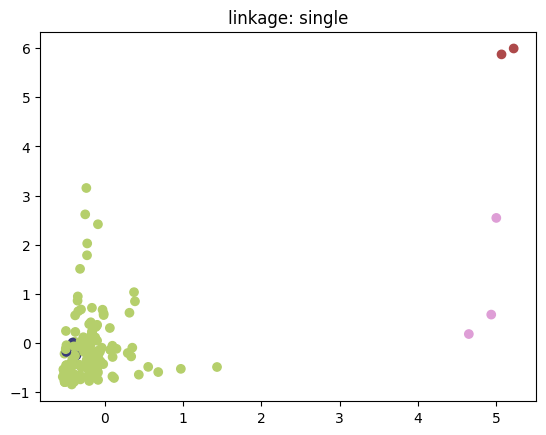

Silhouette Score: 0.5582732715959389


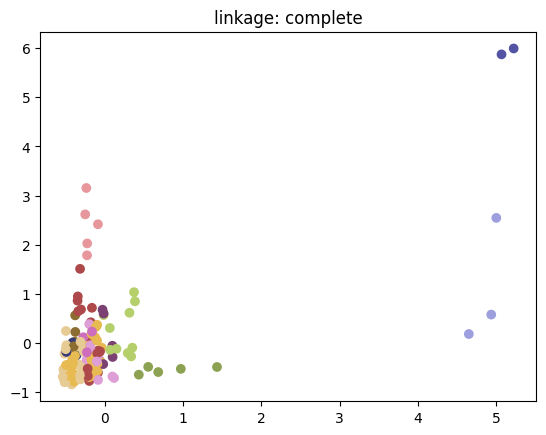

Silhouette Score: 0.3566631100581737


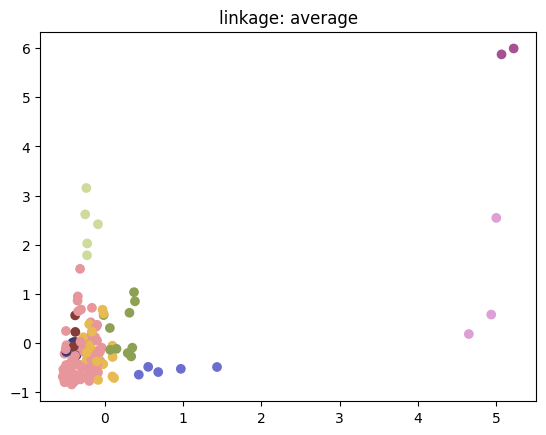

Silhouette Score: 0.49975592263923546


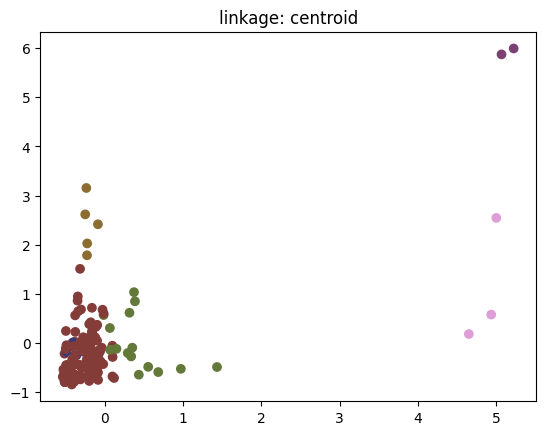

Silhouette Score: 0.45773910318602357


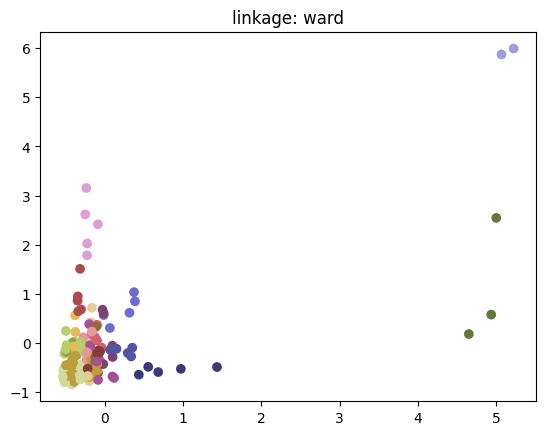

Silhouette Score: 0.509289583691732


In [ ]:
for method in methods:
    distances = linkage(x_estandarizado, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance")
    plt.title('linkage: ' + method)
    plt.scatter(x_estandarizado[:,0], x_estandarizado[:,1], c=clusters, cmap='tab20b')
    plt.show()
    score_6 = silhouette_score(x_estandarizado, clusters)
    print(f"Silhouette Score: {score_6}")

Se procedió a realizar el ejercicio de cauterización con los datos estandarizados, por el método de clúster jerárquico evaluando los diferentes métodos de enlace entre los puntos, evidenciando que en algunos casos se genera una superposición de los datos de los clústeres lo cual no permite un análisis claro de las agrupaciones generadas, en este ejercicio el modelo con el mejor score de Silhouette corresponde a al modelo con enlace tipo single con un score de 0.56 generando 4 grupos diferentes. a continuación, procederemos hacer el mismo ejercicio pero aplicando PCA y compararemos los resultados.

**Clustering jerárquico con PCA**

In [ ]:
# Configurar y aplicar PCA:
n_components = 0.80  # Retener el 80% de la varianza.
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)
x_pca = pca.fit(x_estandarizado)

In [ ]:
# Imprimir la cantidad de componentes y la varianza explicada
print("Número de componentes seleccionados:", pca.n_components_)
print("Varianza explicada por los componentes seleccionados:", sum(pca.explained_variance_ratio_))

Número de componentes seleccionados: 3
Varianza explicada por los componentes seleccionados: 0.8152349530782037


In [ ]:
# Reduzco la dimensión de la matriz de predictores utilizando 3 componentes

n_components = 3
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)

# Ajustar PCA a los datos originales y transformarlos
x_reduced = pca.fit_transform(x_estandarizado)

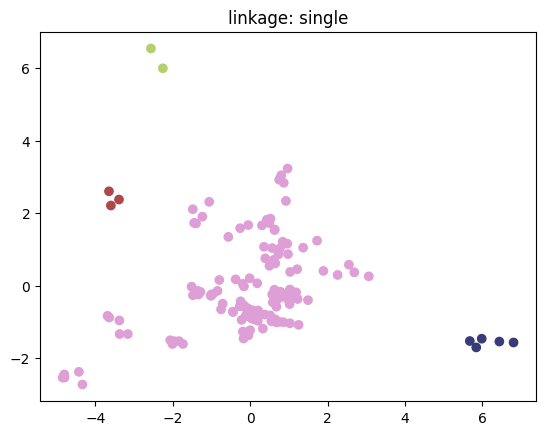

Silhouette Score: 0.5906793291392075


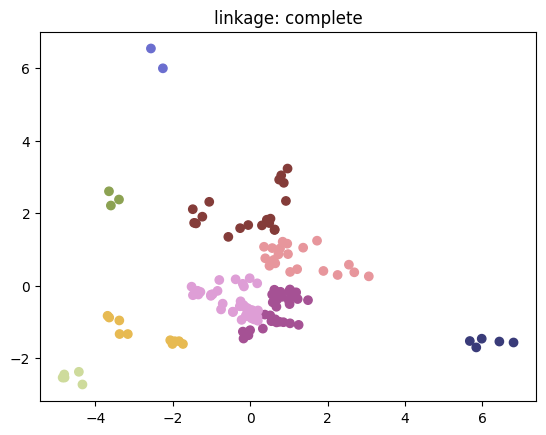

Silhouette Score: 0.407231360408882


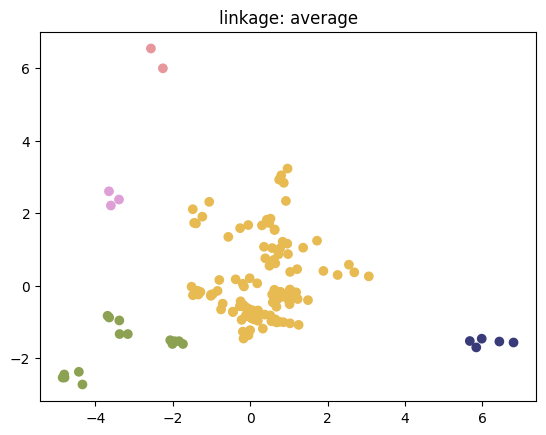

Silhouette Score: 0.6007639193888763


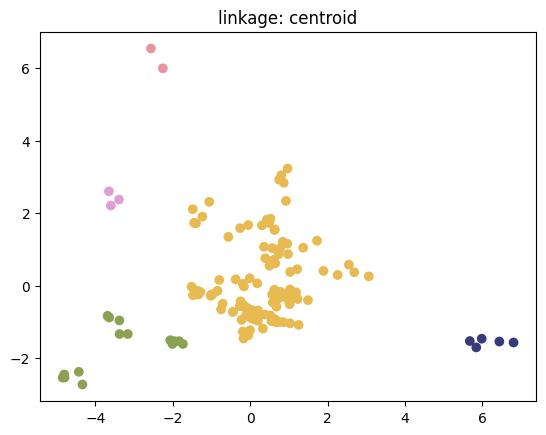

Silhouette Score: 0.6007639193888763


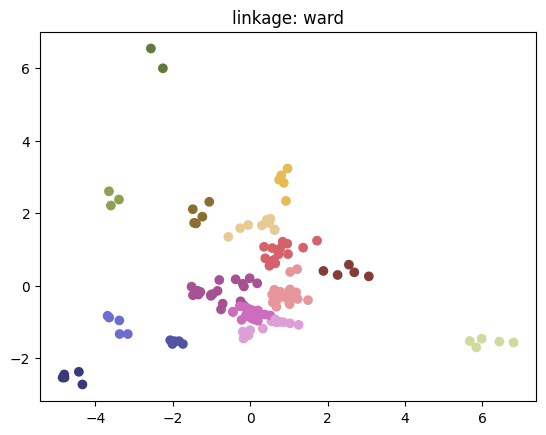

Silhouette Score: 0.5108287011312497


In [ ]:
for method in methods:
    distances = linkage(x_reduced, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance")
    plt.title('linkage: ' + method)
    plt.scatter(x_reduced[:,0], x_reduced[:,1], c=clusters, cmap='tab20b')
    plt.show()
    score_7 = silhouette_score(x_reduced, clusters)
    print(f"Silhouette Score: {score_7}")

Ahora se procedió a realizar el ejercicio de cauterización con los datos estandarizados y con una reducción de la dimensionalidad por medio de PCA, por el método de clúster jerárquico evaluando los diferentes métodos de enlace entre los puntos, Comparando estos resultados con los obtenidos antes de realizar PCA se evidencia una mejora significativa en la generación de las agrupaciones, siendo inclusive fácilmente evidente al ojo humano las diferentes agrupaciones generadas, lo cual permite un análisis más claro de las agrupaciones, en este ejercicio el modelo con el mejor score de Silhouette corresponde a al modelo con enlace tipo “average” y “centroid” para los cuales se obtuvo un score de 0.601 generando 5 grupos diferentes. a continuación, procederemos hacer el mismo ejercicio, pero aplicando PCA y compararemos los resultados.

**Resultados teniendo en cuenta el Coeficiente de Silhouette**

In [ ]:
print(f"Silhouette Score Kmeans: {round(score_1,4)}")
print(f"Silhouette Score Kmeans PCA n_components = 3: {round(score_2,4)}")
print(f"Silhouette Score Kmeans PCA n_components = 2: {round(score_3,4)}")
print(f"Silhouette Score kmedoides: {round(score_4,4)}")
print(f"Silhouette Score kmedoides PCA n_components = 3: {round(score_5,4)}")
for method in methods:
    distances = linkage(x_estandarizado, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance")
    score_7 = silhouette_score(x_estandarizado, clusters)
    print(f"Silhouette Score Jerarquico {method}: {round(score_6,4)}")

for method in methods:
    distances = linkage(x_reduced, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance")
    score_7 = silhouette_score(x_reduced, clusters)
    print(f"Silhouette Score Jerarquico PCA n_components = 3 {method}: {round(score_7,4)}")

Silhouette Score Kmeans: 0.5177
Silhouette Score Kmeans PCA n_components = 3: 0.5971
Silhouette Score Kmeans PCA n_components = 2: 0.5649
Silhouette Score kmedoides: 0.123
Silhouette Score kmedoides PCA n_components = 3: 0.2601
Silhouette Score Jerarquico single: 0.5093
Silhouette Score Jerarquico complete: 0.5093
Silhouette Score Jerarquico average: 0.5093
Silhouette Score Jerarquico centroid: 0.5093
Silhouette Score Jerarquico ward: 0.5093
Silhouette Score Jerarquico PCA n_components = 3 single: 0.5907
Silhouette Score Jerarquico PCA n_components = 3 complete: 0.4072
Silhouette Score Jerarquico PCA n_components = 3 average: 0.6008
Silhouette Score Jerarquico PCA n_components = 3 centroid: 0.6008
Silhouette Score Jerarquico PCA n_components = 3 ward: 0.5108


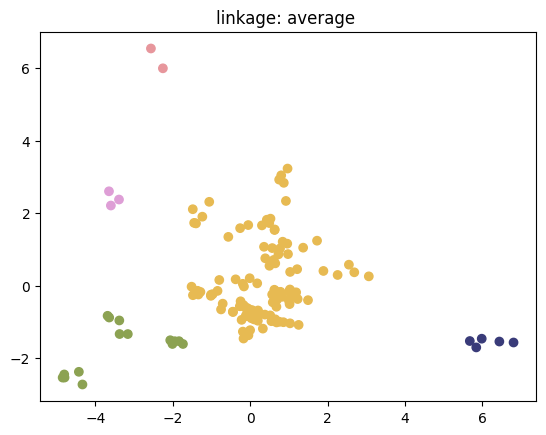

Silhouette Score: 0.6007639193888763


In [ ]:
# Graficar los clusters Kmeans PCA:


distances = linkage(x_reduced, method="average", metric="euclidean")
clusters = fcluster(distances, 3, criterion="distance")
plt.title('linkage: average ')
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=clusters, cmap='tab20b')
plt.show()
score_7 = silhouette_score(x_reduced, clusters)
print(f"Silhouette Score: {score_7}")

Teniendo en cuenta los valores del **Coeficiente de Silhouette** que como se mencionó anteriormente cuantifica cuán buena es la asignación que se ha hecho de una observación, el mejor método de clustering de los utilizados es el valor obtenido por **Clustering Jerarquico con tipo de enlace "average" después de aplicar PCA = 0.6007**, en la gráfica de este método se observa como al reducir la dimensionalidad, las observaciones que para este caso son cada una de las entidades financieras se segmentan de tal manera que forman 5 grupos y esto con respecto al perfil de riesgo financiero que se pretende analizar puede ser muy diciente ya que según los valores de los 2 primeros componentes mostrados en la grafica y teniendo en cuenta que entre mas alto es el indicador mas riesgosa es la entidad se pueden ver los grupos de entidades muy riesgosas , poco riesgosas, solidas, etc en cuanto a riesgo financiero.